# Homework Assignment 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

Load the `'parks.csv'` data set and obtain the `value_counts()` for each state. Use the Pandas `plot()` function to create a `'bar'` chart with the `value_counts()`. Which state has the highest number of National Parks?

In [13]:
data = pd.read_csv("parks.csv")
data.head(5)

,name,location,date_estb,area_2019,visitors_2019,description
0,Acadia,Maine,1919-02-26,49076.63,3437286.0,Covering most of Mount Desert Island and other...
1,American Samoa,American Samoa,1988-10-31,8256.67,60006.0,The southernmost national park is on three Sam...
2,Arches,Utah,1971-11-12,76678.98,1659702.0,"This site features more than 2,000 natural san..."
3,Badlands,South Dakota,1978-11-10,242755.94,970998.0,"The Badlands are a collection of buttes, pinna..."
4,Big Bend,Texas,1944-06-12,801163.21,463832.0,Named for the prominent bend in the Rio Grande...


In [4]:
location_count = data["location"].value_counts()
location_count

California                   9
Alaska                       8
Utah                         5
Colorado                     4
Florida                      3
Washington                   3
Arizona                      3
Hawaii                       2
New Mexico                   2
South Dakota                 2
Texas                        2
Oregon                       1
Wyoming, Montana, Idaho      1
Ohio                         1
U.S. Virgin Islands          1
Arkansas                     1
Virginia                     1
South Carolina               1
Maine                        1
Michigan                     1
North Dakota                 1
Missouri                     1
American Samoa               1
Kentucky                     1
Nevada                       1
Montana                      1
Wyoming                      1
Indiana                      1
West Virginia                1
North Carolina, Tennessee    1
Minnesota                    1
Name: location, dtype: int64

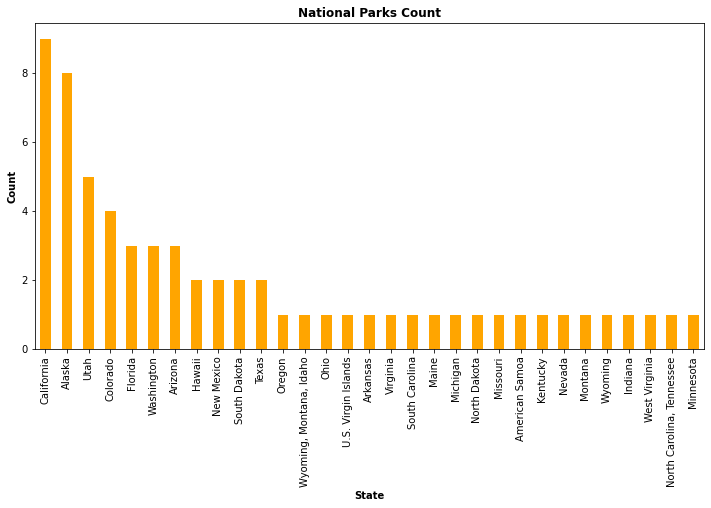

In [9]:
plt.figure(figsize = (12, 6))
location_count.plot.bar(stacked=True, color = "orange")
plt.xlabel("State", fontsize = 10, fontweight = "bold")
plt.ylabel("Count", fontsize = 10, fontweight = "bold")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("National Parks Count",fontweight = "bold")
plt.show()

In [37]:
print("{state} has the highest number of National Parks and the count is {count}.".format(state = "California", count = 9))

California has the highest number of National Parks and the count is 9.


### Question 2

Group the `parks` data by `location` to find the `mean` number of `visitors_2019` for each state, then `plot()` these results using a `'bar'` chart again. Does this graph look the same or different from the graph in Question 1? (**Note:** Remember to pass `sort_values(ascending=False)` after your `groupby` aggregation to plot the values in descending order from most-visited states to least-visited!)

In [49]:
park_grouploc = data["visitors_2019"].groupby(data["location"]).mean().sort_values(ascending=False)
round(park_grouploc,2)

location
North Carolina, Tennessee    12547743.00
Wyoming, Montana, Idaho       4020288.00
Maine                         3437286.00
Wyoming                       3405614.00
Montana                       3049839.00
Arizona                       2546075.00
Ohio                          2237997.00
Utah                          2140677.80
Indiana                       2134285.00
Missouri                      2055309.00
Washington                    1595211.67
Colorado                      1546655.00
Arkansas                      1467153.00
Virginia                      1425507.00
California                    1404347.89
Hawaii                        1181385.00
South Dakota                   793174.00
Oregon                         704512.00
North Dakota                   691658.00
Florida                        635340.67
Kentucky                       551590.00
New Mexico                     524738.00
Texas                          326332.50
Minnesota                      232974.00
Alaska 

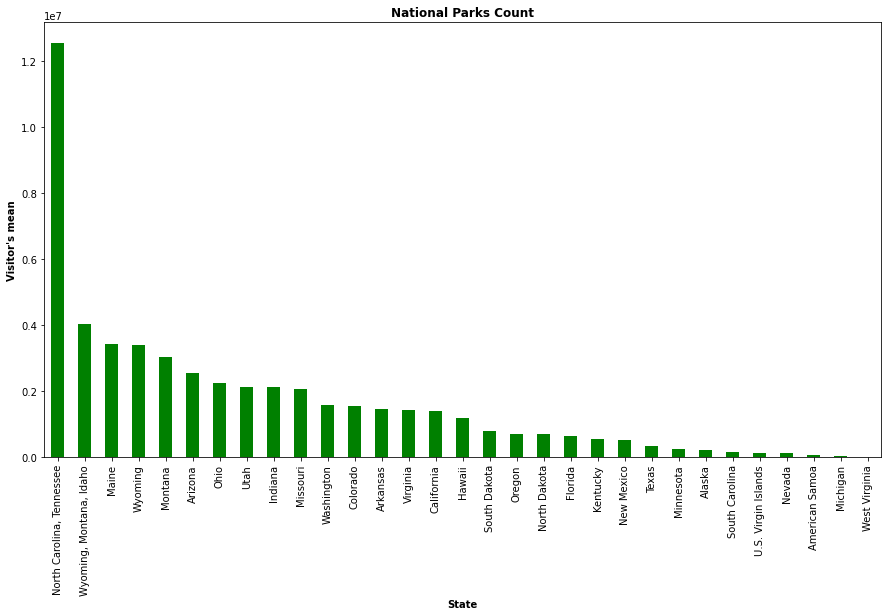

In [58]:
plt.figure(figsize = (15, 8))
park_grouploc.plot.bar(stacked=True, color = "g")
plt.xlabel("State", fontsize = 10, fontweight = "bold")
plt.ylabel("Visitor's mean", fontsize = 10, fontweight = "bold")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title("National Parks Count",fontweight = "bold")
plt.show()

In [129]:
print("Both the graphs are different."\
"\nBelow are my observations:"\
"\n"\
"1. In question 1, the graphs shows number of parks in each state, where as in question 2, the graph shows average visitors in each park based on location."\
"\n2. California has highest number of parks of count 9 and there are majority of states which has only one National parks."\
"\n3. North Carolina, Tennessee has highest average visitors but the state has only one National park."\
"\n4. Average visitors in California National Park has less compared to other states like North Carolina, Tennessee, Wyoming, Montana, Idaho, Maine, Arizona, Ohio etc."\
"\n5. Visitor's information of West Virginia is missing."\
"\n6. Michigan is on the last spot on average visitors.")

Both the graphs are different.
Below are my observations:
1. In question 1, the graphs shows number of parks in each state, where as in question 2, the graph shows average visitors in each park based on location.
2. California has highest number of parks of count 9 and there are majority of states which has only one National parks.
3. North Carolina, Tennessee has highest average visitors but the state has only one National park.
4. Average visitors in California National Park has less compared to other states like North Carolina, Tennessee, Wyoming, Montana, Idaho, Maine, Arizona, Ohio etc.
5. Visitor's information of West Virginia is missing.
6. Michigan is on the last spot on average visitors.


### Question 3

Are older parks more popular than newer parks? To find out, first create a new variable for the `'year'` of establishment by passing the `'date_estb'` column in the function `pd.DatetimeIndex().year` (we will cover this in more depth in Class 5.) To account for multiple parks being opened in the same year, create a new DataFrame grouping the `parks.csv` data by `'year'` and summing the `'visitors_2019'` for each year and `reset_index()`. Then create a line plot with `'year'` on the x-axis and `'visitors_2019'` on the y-axis using this grouped DataFrame.

In [15]:
data["year"] = pd.DatetimeIndex(data["date_estb"]).year
data["year"].head()

0    1919
1    1988
2    1971
3    1978
4    1944
Name: year, dtype: int64

In [17]:
Park_grpbyYear = data["visitors_2019"].groupby(data["year"]).sum().reset_index()
Park_grpbyYear.head(3)

,year,visitors_2019
0,1872,4020288.0
1,1890,5668914.0
2,1899,1501621.0


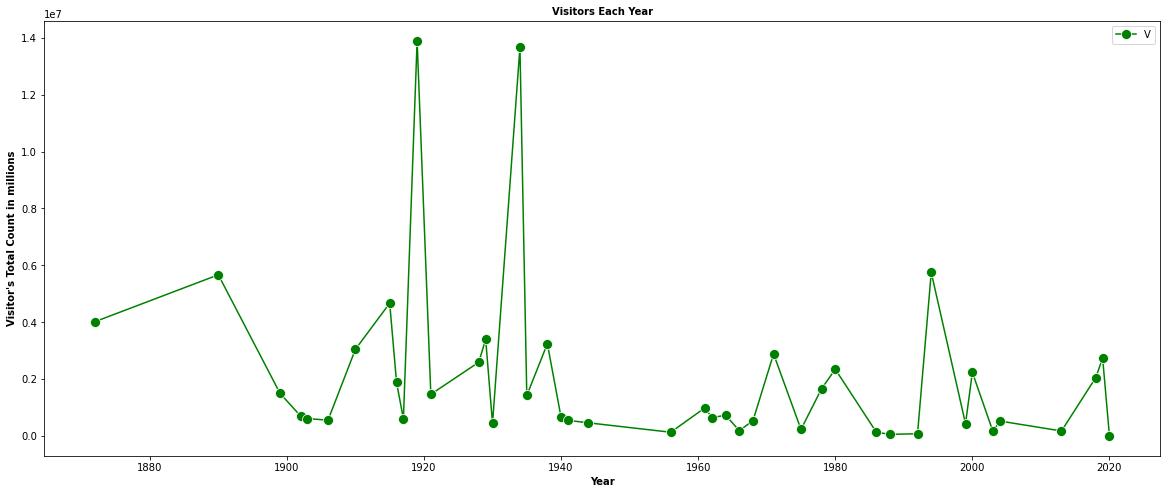

In [21]:
plt.figure(figsize = (20,8))
sns.lineplot(x = "year", y = "visitors_2019", data = Park_grpbyYear, color = "green", marker = 'o', markersize = 10, linestyle = '-')
plt.title("Visitors Each Year", fontsize = 10, fontweight = "bold")
plt.xlabel("Year", fontsize = 10, fontweight = "bold")
plt.ylabel("Visitor's Total Count in millions", fontsize = 10, fontweight ="bold")
plt.legend("Visitor count")
plt.show()

In [120]:
print("Yes, Older parks are more popular than new parks."\
"\nBelow are my observation:"\
"\n1. The period betwen 1918 - 1938 witnessed highest visitors.")

Yes, Older parks are more popular than new parks.
Below are my observation:
1. The period betwen 1918 - 1938 witnessed highest visitors.


### Question 4

Use Seaborn's `boxplot` function to compare the number of visitors to the national parks in California, Alaska, and Utah. Though these states have the largest numbers of national parks, do they see the same number of visitors? (**Note:** You will have to pass a subset of the DataFrame to the `data` argument to select only these three states. Recall that `.isin()` can take a list of strings when creating a Boolean mask for your data.)

In [90]:
data_three_states = data[data["location"].isin(['California', 'Alaska', 'Utah'])]

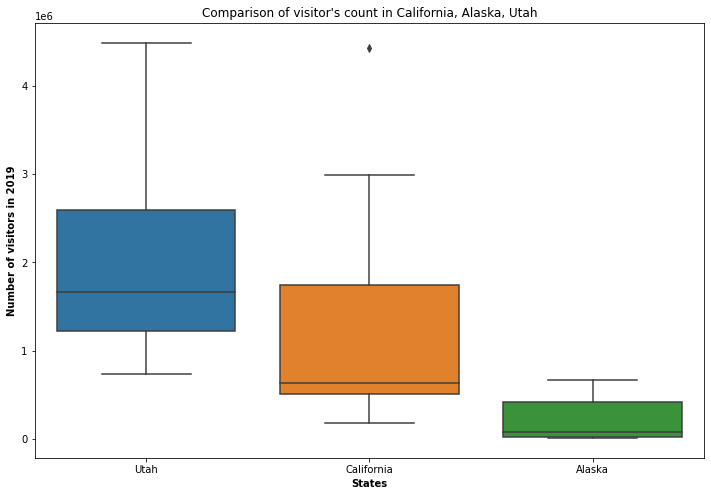

In [101]:
plt.figure(figsize = (12,8))
sns.boxplot(x = "location", y = "visitors_2019", data = data_three_states)
plt.title("Comparison of visitor's count in California, Alaska, Utah")
plt.ylabel("Number of visitors in 2019", fontsize = 10, fontweight = "bold")
plt.xlabel("States", fontsize = 10, fontweight = "bold")
plt.show()

In [115]:
print("Count of visitors varies in 3 states i.e Utah, California, and Alaska."\
"\nUtah has the highest visitors among three."\
"\nAlaska has the lowest number of visitors among the three states.")

Count of visitors varies in 3 states i.e Utah, California, and Alaska.
Utah has the highest visitors among three.
Alaska has the lowest number of visitors among the three states.


### Question 5

Do people flock to larger parks? Plot a scatterplot of `area_2019` by `visitors_2019` using Seaborn's `regplot` function.

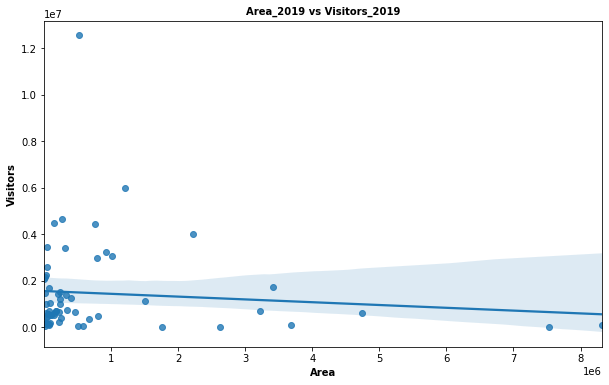

In [108]:
plt.figure(figsize = (10,6))
sns.regplot(x = "area_2019", y = "visitors_2019", data = data)
plt.title("Area_2019 vs Visitors_2019", fontsize = 10, fontweight = "bold")
plt.ylabel("Visitors", fontsize = 10, fontweight = "bold")
plt.xlabel("Area", fontsize = 10, fontweight = "bold")
plt.show()

In [110]:
print("People do not flock to larger parks.")

People do not flock to larger parks.


### Question 6

Load the data `'nyc_buildings.csv'` and create a scatterplot of `height` and `floors`. Does the relationship between these two variables appear stronger or weaker than the relationship seen in Question 5?

In [22]:
NYC_Building = pd.read_csv("nyc_buildings.csv")
NYC_Building.head(3)

,rank,name,height,floors,year,address,street
0,1,One World Trade Center,1776,104,2014,285 Fulton Street,Fulton Street
1,2,Central Park Tower,1550,98,2020,225 West 57th Street,West 57th Street
2,3,111 West 57th Street,1428,84,2021,111 West 57th Street,West 57th Street


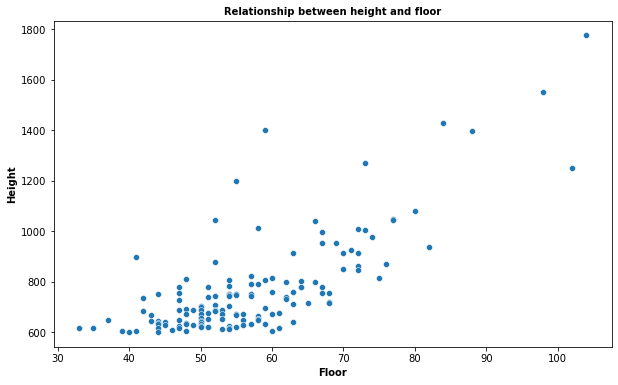

In [23]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "floors", y = "height", data = NYC_Building)
plt.title("Relationship between height and floor", fontsize = 10, fontweight = "bold")
plt.ylabel("Height", fontsize = 10, fontweight = "bold")
plt.xlabel("Floor", fontsize = 10, fontweight = "bold")
plt.show()

In [138]:
print("The relationship between height and floor seems to be stronger than the relationship in Question 5."\
"\nThere is a strong relationship betweeb height and floor where as visitors and area has week relationship.")

The relationship between height and floor seems to be stronger than the relationship in Question 5.
There is a strong relationship betweeb height and floor where as visitors and area has week relationship.


### Question 7

Group the `nyc_buildings` data by `year` and `sum` the total `height` for all buildings. Plot the resulting DataFrame as a line plot. Are the tallest buildings in New York relatively old or relatively young?

In [24]:
Height_grp_year = NYC_Building[["height"]].groupby(NYC_Building["year"]).sum().reset_index()
Height_grp_year.head(3)

,year,height
0,1909,700
1,1913,792
2,1928,615


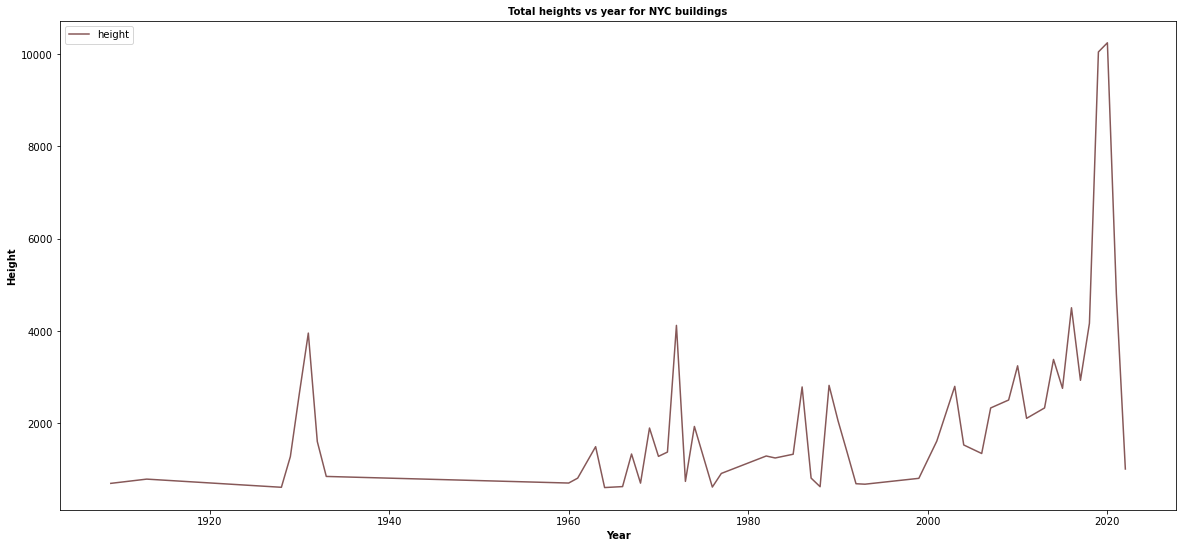

In [26]:
Height_grp_year.plot.line(x = 'year', y = 'height', figsize = (20,9), color = "#865858");
plt.xlabel("Year", fontsize = 10, fontweight = "bold")
plt.ylabel("Height", fontsize = 10, fontweight = "bold")
plt.title("Total heights vs year for NYC buildings", fontsize = 10, fontweight = "bold")
plt.show()

In [173]:
print("From the graph it looks like the tallest buildings was constructed in the year 2020")

From the graph it looks like the tallest buildings was constructed in the year 2020


### Question 8

Are there streets in New York where tall buildings are especially concentrated? Group the data by `street` and `sum` the `height` of the buildings. Reset the index and sort the values from tallest to smallest. Create a bar plot of the top 10 streets with the tallest total heights. Is anything surprising? (**Note:** To view the x-axis labels more clearly, first declare your subplots with `f, ax = plt.subplots()` before creating your barplot. In the barplot options, set `ax=ax`. Then you can use `ax.set_xticklabels` and pass the list of top ten street names as the labels while explicitly declaring the degrees of rotation you would like to see.)

In [201]:
Height_grp_street = NYC_Building[["height"]].groupby(NYC_Building["street"]).sum().reset_index()
Height_grp_street = Height_grp_street.sort_values("height", ascending=False)
Top10 = Height_grp_street.iloc[:10]
Top10

,street,height
36,Park Avenue,7812
9,Broadway,7303
45,Sixth Avenue,7038
64,West 57th Street,6772
24,Fifth Avenue,6509
30,Lexington Avenue,4063
26,Greenwich Street,3712
32,Madison Avenue,3320
60,West 42nd Street,3224
59,West 34th Street,2539


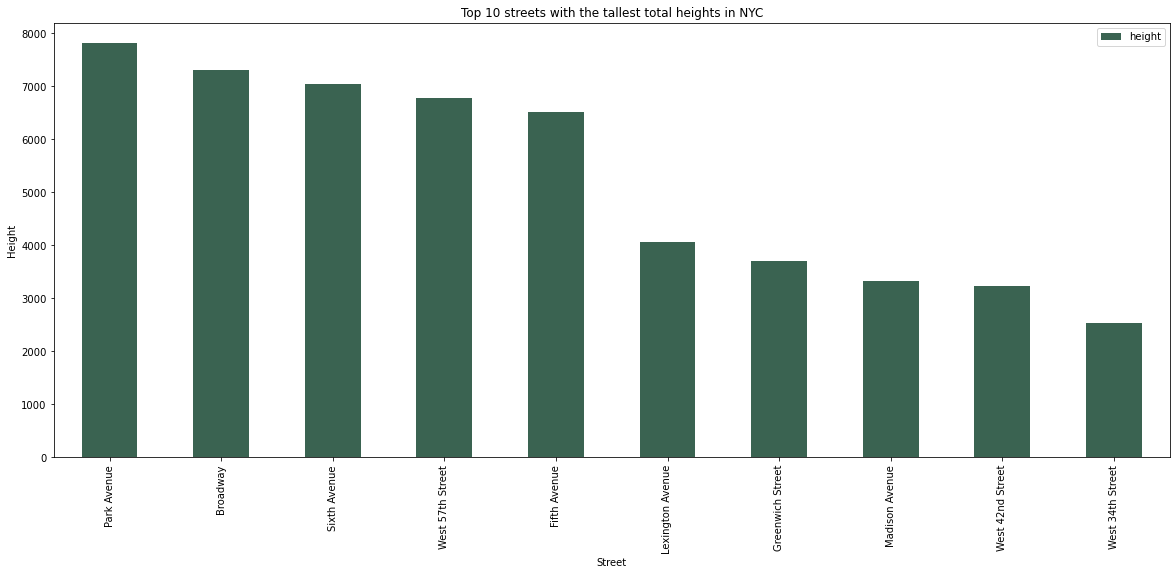

In [204]:
fig, ax = plt.subplots(1, figsize=(20,8))
Top10.plot.bar(ax=ax, color = "#3a6351")
ax.set_xticklabels(Top10["street"], rotation = 90)
ax.set_title('Top 10 streets with the tallest total heights in NYC')
ax.set_xlabel("Street")
ax.set_ylabel("Height")
ax.legend()
plt.show()

In [206]:
print("Yes, these streets has the most concentrated tall buildings."\
"\nPark Avenue has the most concentrated tall buildings.")

Yes, these streets has the most concentrated tall buildings.
Park Avenue has the most concentrated tall buildings.


### Question 9

Look at the distribution of `floors` in the `nyc_buildings` data using Seaborn's `distplot` function. Use 30 bins. Then `print` the `mean` number of `floors` in the data set -- does this agree with what you would have expected from looking at the graph?

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


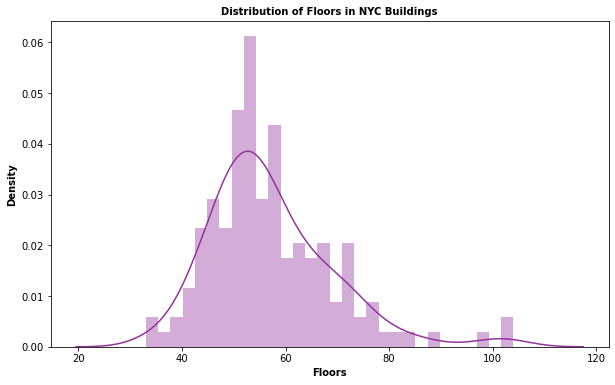

In [217]:
plt.figure(figsize = (10,6))
sns.distplot(NYC_Building["floors"], bins = 30, color = "#93329e")
plt.title("Distribution of Floors in NYC Buildings", fontsize = 10, fontweight = "bold")
plt.ylabel("Density", fontsize = 10, fontweight = "bold")
plt.xlabel("Floors", fontsize = 10, fontweight = "bold")
plt.show()

In [218]:
print("Mean number of floors: ", np.round(NYC_Building["floors"].mean(),2))

Mean number of floors:  57.15


In [220]:
print("Yes, both the result of mean function and distplot highest bar are in sync."\
"\nThe mean function shows the mean number of floors is 57 and the distplot highest bar is around 57.")

Yes, both the result of mean function and distplot highest bar are in sync.
The mean function shows the mean number of floors is 57 and the distplot highest bar is around 57.


### Question 10

Are there height differences between even-numbered floors and odd-numbered floors in New York? Recall that we can use `np.where()` to create a new variable, and that the modulus operator `%` will return the remainder. Create a binary variable called `'even'` where the field is `True` for an even number of floors and `False` for odd. Using Seaborn's `catplot` function, set `col='even'` and `kind='box'` to compare the two different `y='height'`. What do you observe?

In [232]:
NYC_Building["Even_Odd_Floor"] = np.where(NYC_Building["floors"] % 2 == 0, 'Even','Odd')
NYC_Building.head()

,rank,name,height,floors,year,address,street,Even_Old_Floor,Even_Odd_Floor
0,1,One World Trade Center,1776,104,2014,285 Fulton Street,Fulton Street,Even,Even
1,2,Central Park Tower,1550,98,2020,225 West 57th Street,West 57th Street,Even,Even
2,3,111 West 57th Street,1428,84,2021,111 West 57th Street,West 57th Street,Even,Even
3,4,One Vanderbilt,1401,59,2020,One Vanderbilt Avenue,Vanderbilt Avenue,Odd,Odd
4,5,432 Park Avenue,1396,88,2015,432 Park Avenue,Park Avenue,Even,Even


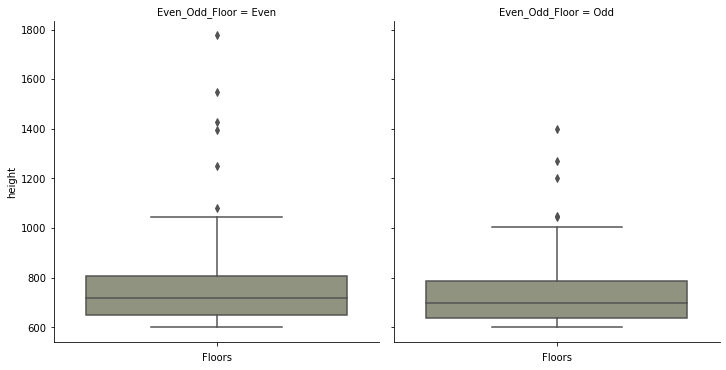

In [249]:
graph = sns.catplot(y = "height", col = "Even_Odd_Floor", data = NYC_Building, kind = "box", color = "#92967d", )
graph.set(xlabel = "Floors")

In [ ]:
There is a height difference between even-numbered floors and odd-numbered floors in New York. 
Below are my observations: 
1. The median for both is around 700. 
2. The number of outliers are more in Even floors as compared to Odd Floor